<a href="https://colab.research.google.com/github/Kanyawesr/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [2]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [3]:
Name = 'กัญญาวีร์ ศรีเทียมเงิน'
ID = '6230205111'

ฟังก์ชันในภาษา Python นั้นจะใช้คำสั่ง def และหลังจากนั้น function_name เป็นชื่อของฟังก์ชัน และในวงเล็บ () เป็นการกำหนดพารามิเตอร์ของฟังก์ชัน พารามิเตอร์ของฟังก์ชันนั้นสามารถมีจำนวนเท่าไหร่ก็ได้หรือไม่มีก็ได้ และเช่นเดียวกับภาษาอื่นๆ ฟังก์ชันอาจจะมีหรือไม่มีการส่งค่ากลับ สำหรับฟังก์ชันที่ไม่มีการ return ค่ากลับนั้นเรียกว่า Procedure

In [4]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [5]:
Data = DataGenerator(Name,ID)

020:30:22


In [6]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-5.235210,-2.860860,-0.805871,-6.856979,-6.777006,-8.583028,7.259264,1.447058,-4.348699,-11.271009,3.188789,-3.706942,2.009193,1.570851,9.985383,2.633004,-0.269312,9.070029,7.393669,-8.279610,-7.588774,-0.331426,4.126808,0.896063,-6.202212,-2.145307,-9.459880,-6.749552,-7.682965,4.194720,-5.721721,22.973601
1,9.510645,-11.724693,-5.819783,-0.784435,4.213936,9.149353,7.801894,1.899180,-2.084421,-0.698642,6.422391,3.871113,4.632243,-0.403535,6.446859,5.793426,-5.205285,0.412460,5.175845,-9.418035,-9.259097,10.100478,7.104180,4.488556,7.110296,-5.801875,-8.563083,4.534392,-1.015977,6.009005,-23.449386,32.045023
2,9.768125,-9.505962,-5.533852,-1.030323,4.315569,10.896623,7.123481,2.266101,-1.416885,-2.166934,2.684397,4.669916,6.283261,-2.630425,10.382282,5.216370,-5.983786,1.917078,3.739032,-10.258786,-9.797286,9.477836,5.785408,4.343419,8.028847,-4.558729,-7.085180,3.283552,-0.202463,5.715904,-19.011924,30.579518
3,0.265184,-3.451455,-6.242929,11.222199,-1.053836,4.398465,-6.825062,4.595991,3.862471,4.729208,9.165959,6.151587,-0.823517,9.247155,-6.436628,3.884506,8.047165,2.184967,2.046106,8.087513,-1.901367,0.155482,-1.531668,5.135129,-8.600767,-7.648380,-7.757502,5.174454,-4.832281,2.099184,-6.902911,12.495921
4,-1.146704,-7.142143,1.101740,7.364864,-9.830379,-2.518818,-0.905386,-2.886974,-7.672461,-5.743728,9.156414,-5.083711,-11.229786,-1.163712,2.759683,-2.571018,8.121640,-4.834813,9.562179,-2.797196,7.536796,0.250696,-6.008766,-9.761062,8.361335,7.242344,4.432262,-1.469124,-1.062886,6.270803,-14.284285,33.354013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.468904,1.508715,-5.344932,-10.006272,4.791907,-0.434561,-2.514041,-0.196371,-5.284415,-3.984139,0.066370,3.120663,-3.187021,-1.873491,-4.708044,2.196728,-6.470265,2.258201,4.821559,-7.505703,3.943361,-2.060711,4.861821,6.092516,6.662436,1.913058,4.627481,2.277454,-2.579394,2.949088,3.017429,16.745438
9996,-3.648360,-10.778105,-4.391808,-9.771854,-2.643268,2.147130,-9.317066,-10.317206,1.935296,3.543057,-4.064741,-5.384925,1.282269,-1.254489,-7.606798,9.634642,9.467173,7.251492,-10.231833,-7.762669,-7.127021,1.845076,1.811317,5.178686,3.237937,6.232463,-8.661862,1.788290,4.374740,-4.792314,-21.556211,-21.961569
9997,8.435509,-6.554998,-8.754114,-4.359208,4.330762,-1.767436,-4.784996,-5.611044,8.741600,0.262239,7.516994,1.931891,-6.907949,8.729823,0.912568,-9.401059,0.683269,-4.586662,6.855340,-2.787098,-6.923734,9.168708,-6.908518,4.623331,5.178249,8.891360,-0.605690,-8.514347,-2.075814,-4.940532,-13.109996,-22.702661
9998,0.127080,4.501513,-3.334955,-3.516207,8.116519,-10.444870,-4.854239,-7.782008,-5.369580,3.583364,-7.395462,-1.538423,0.956582,-3.833582,-3.877565,2.837093,6.527495,-2.057050,-7.983029,6.432964,5.527862,-3.140381,1.553203,-0.265407,3.904482,-7.439079,-6.935518,8.433059,6.970092,-8.077428,9.003027,-38.387138


#2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

##Kmean
ใช้วิธี Kmean คือการจัดกลุ่มข้อมูลจากการวัดระยะห่างระหว่างข้อมูล ซึ่งมี 3 ขั้นตอน คือ import Define Fit-tranform 

####import

In [7]:
from sklearn.cluster import KMeans  

####Define

Defind ทำการกำหนดค่า k ที่เราต้องการ กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะ kmeanมี defult)

In [8]:
kmeans = KMeans(n_clusters=3, random_state=2021)  

####Fit-tranform

คำนวณจุด Cluster center ของข้อมูล Data ด้วยวิธี K-means clustering

In [9]:
kmeans.fit(Data)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดงจุดที่คำนวณออกมาได้

In [10]:
kmeans.cluster_centers_   

array([[ -0.49808634,  -1.9352524 ,  -0.93086952,   0.98646392,
          0.78380076,   0.35999225,  -1.51469749,  -2.47939448,
         -1.66271432,   3.29058551,  -0.23215796,   1.63674291,
          2.73415177,   3.86641907,  -2.13662307,   0.07710388,
          3.12588517,   1.08147602,  -3.5476719 ,   1.01045977,
         -0.64646438,  -1.2814994 ,  -1.52421091,  -0.17209823,
         -0.5562469 ,   0.08024251,  -2.33108529,  -2.07555631,
          0.40221494,  -7.08679309,  -3.8705048 , -33.43396546],
       [  1.27705788,   2.69643409,  -2.17089145,   1.50044564,
          1.34834239,  -1.6359739 ,   2.69133613,   2.08798819,
          3.99647111,  -2.2390335 ,   0.68013797,  -0.43566584,
         -1.34183055,  -1.16813889,  -3.90255181,  -0.46982533,
         -0.07310901,   1.76299018,   1.49191588,  -1.86337527,
          1.02866383,  -0.96307366,  -0.47717973,  -2.23702376,
          3.96852533,  -2.98831378,   0.54450559,   1.99846056,
          1.33701243,   2.35552481,   5

ทดสอบการจัดกลุ่มของ Data
- กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น  y

In [11]:
y = kmeans.predict(Data)  
y

array([2, 2, 2, ..., 0, 0, 1], dtype=int32)

#### PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #กำหนดค่า Dimension = 2

new_pca = pca.fit_transform(Data)

In [13]:
from matplotlib import pyplot as plt

In [14]:
import matplotlib

In [15]:
matplotlib.rcParams['figure.figsize']=[15,20] #ทำการเพิ่มขนาดของกราฟ เพื่อให้ดูการกระจายของข้อมูลได้ง่ายขึ้นและดูข้อมุลที่ซ้อนทับกันได้ง่ายขึ้น

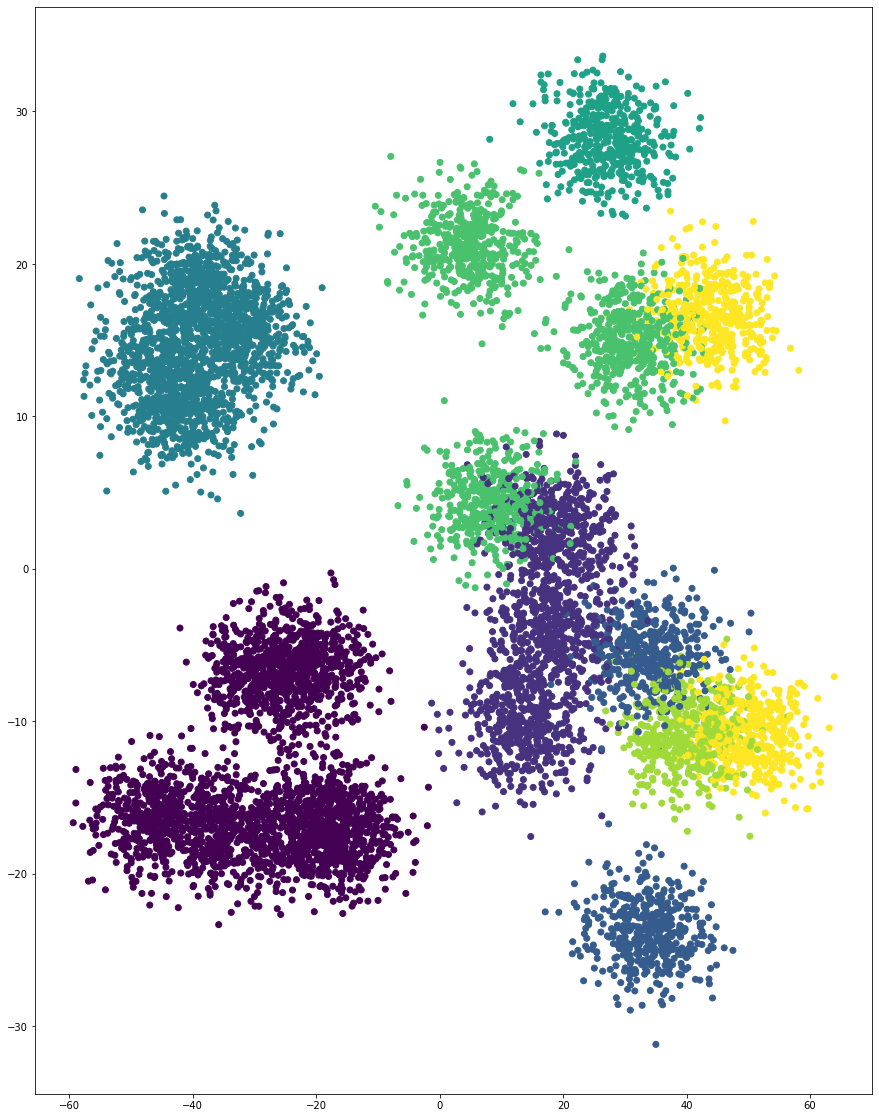

In [16]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

####หาค่า K ด้วยวิธีของ Elbow Method 



In [17]:
kmeans.inertia_    

7230682.0301326085

In [18]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [19]:
SSE #เเสดงค่า SSE

[21383197.695221562,
 12526383.352083936,
 11134453.960132588,
 9906995.413663898,
 9144006.591083162,
 8391396.655424077,
 7801784.776167525,
 7230682.0301326085]

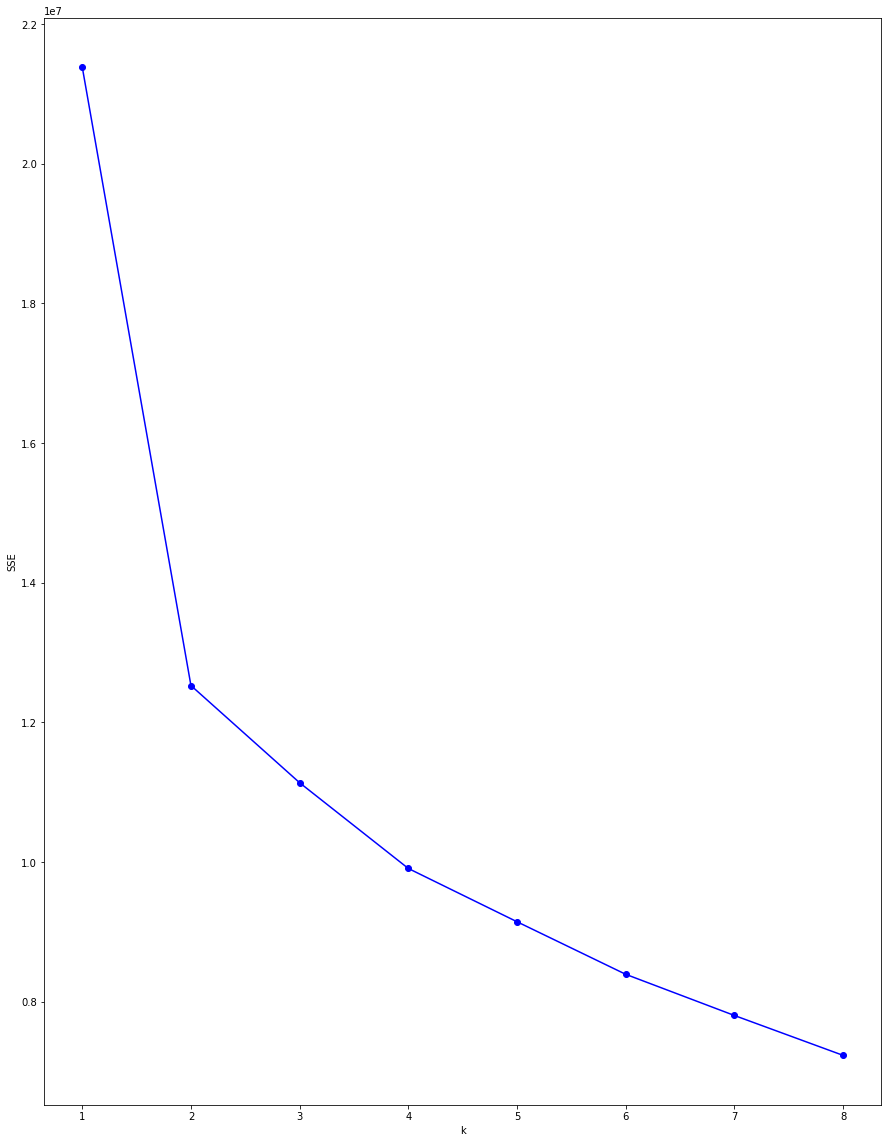

In [20]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')        #นำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม         
plt.xlabel('k')
plt.ylabel('SSE');
matplotlib.rcParams['figure.figsize']=[7,7]

k = 4 กลุ่ม เนื่องจากจุดที่ k ที่ 4 เริ่มมีความแตกต่างของระยะห่างระหว่างจุดที่ใกล้กัน

####หา k ด้วยวิธี Silhouette coefficient

In [21]:
from sklearn import metrics

In [22]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

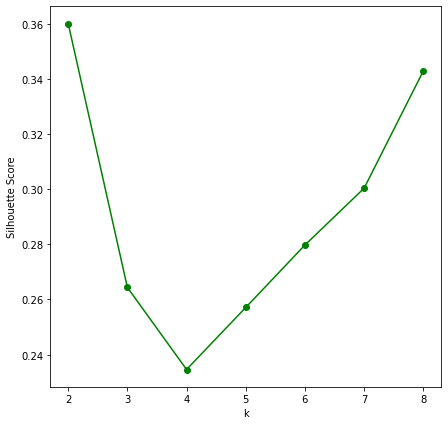

In [23]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จุดที่มี Silhouette score สูงสุด จะดีที่สุด จากกราฟ  k=8 จะมี Silhouette score=0.36   แปลว่ามีความใกล้กันและความห่างของ Dataในกลุ่มเดียวกัน



In [24]:
matplotlib.rcParams['figure.figsize']=[15,20] #เพิ่มขนาดของกราฟเพื่อให้ดูการกระจายของข้อมูลได้ง่ายขึ้น

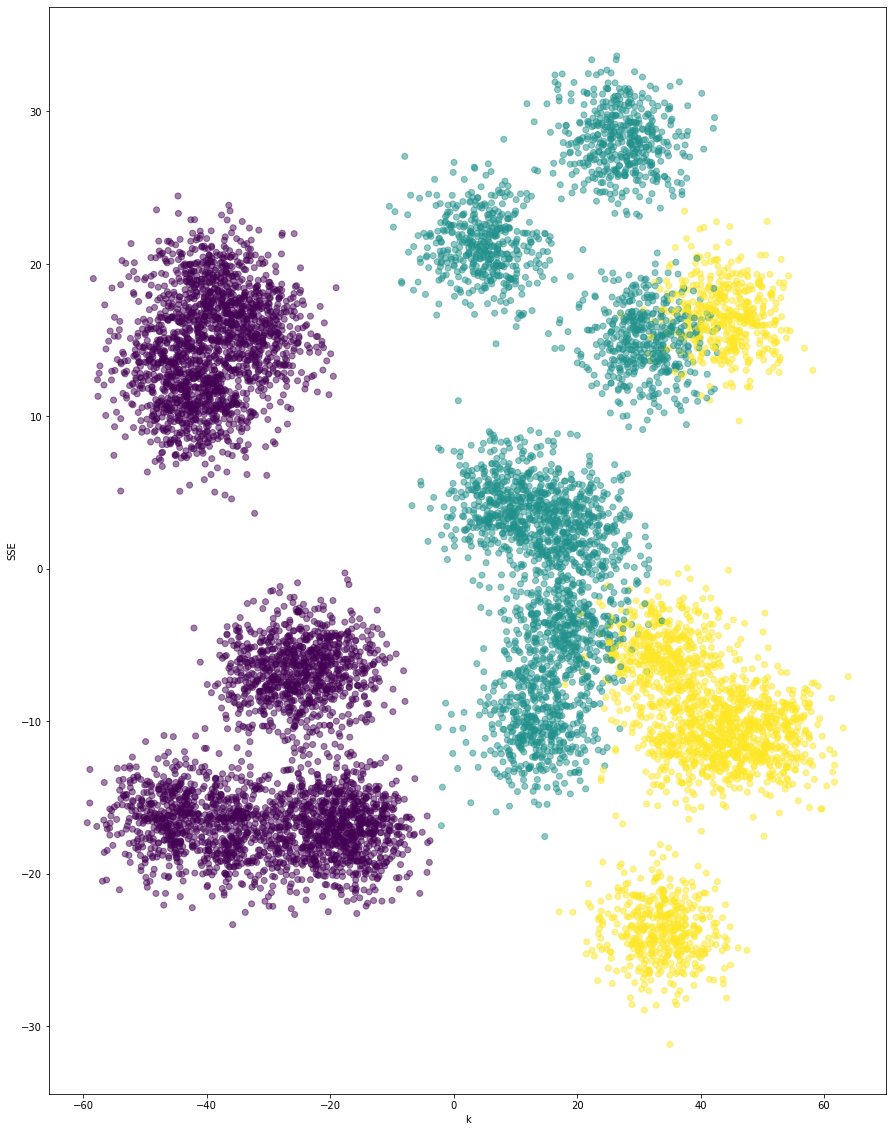

In [25]:
kmeans = KMeans(n_clusters = 3 ,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.xlabel('k')
plt.ylabel('SSE');

จากรูปกราฟจะเห็นว่ายังมีข้อมูลที่ทับซ้อนกันอยู๋

#3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

เนื่องจากข้อมูลมีจำนวนมาก จึงเกิดการทับซ้อน ดังนั้นจะทำการลด Dimension ด้วยวิธี MDS

####MDS

In [26]:
from sklearn.manifold import MDS

In [27]:
mds = MDS(n_components=2) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2 

In [28]:
New_mds = mds.fit_transform(Data) #ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด 

k-means  เป็นการจัดกลุ่มจากการวัดระยะห่างในการจัดกลุ่ม ระหว่างจุดข้อมูล

In [29]:
kmeans2 = KMeans(n_clusters=3,random_state=2021)  
kmeans2.fit(Data) 
D = kmeans2.predict(Data)

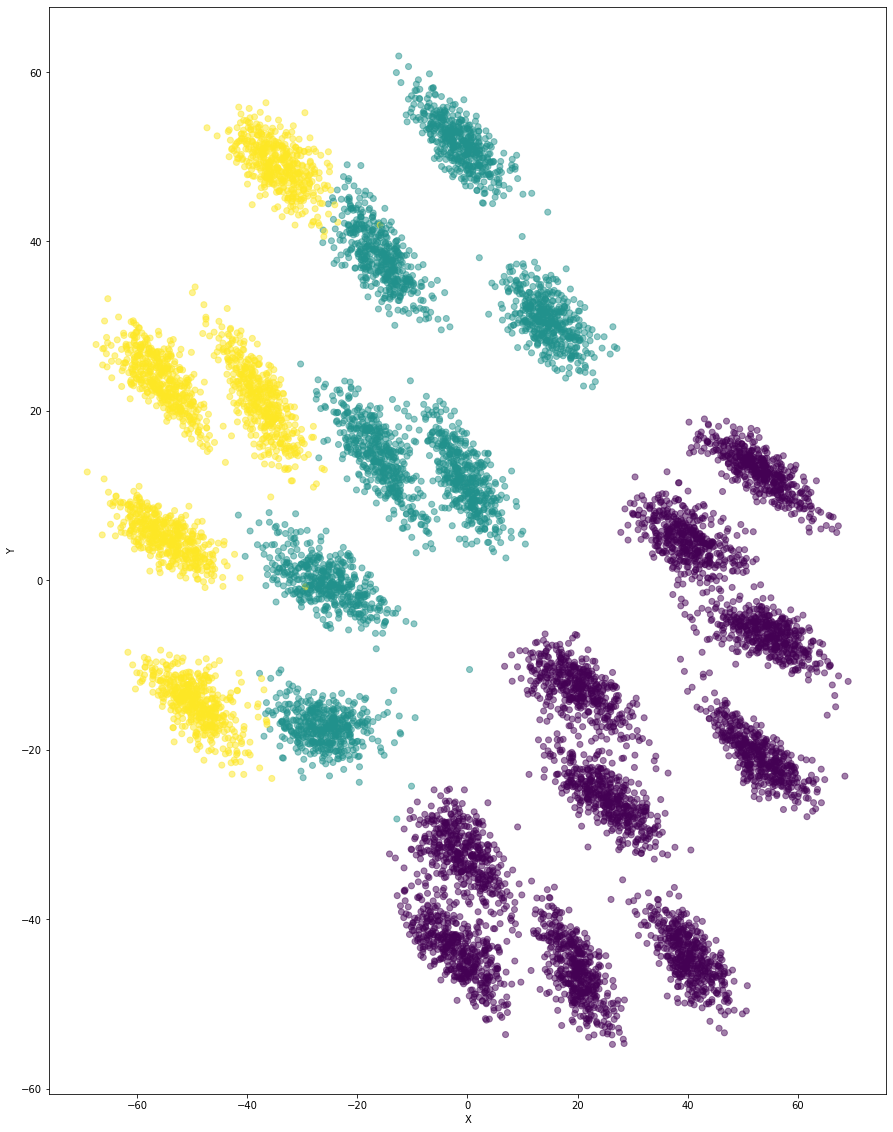

In [30]:
plt.scatter(New_mds[:,0],New_mds[:,1],c=D,alpha=0.5)
plt.xlabel('X') 
plt.ylabel('Y');

#4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.


กราฟจากข้อ 2

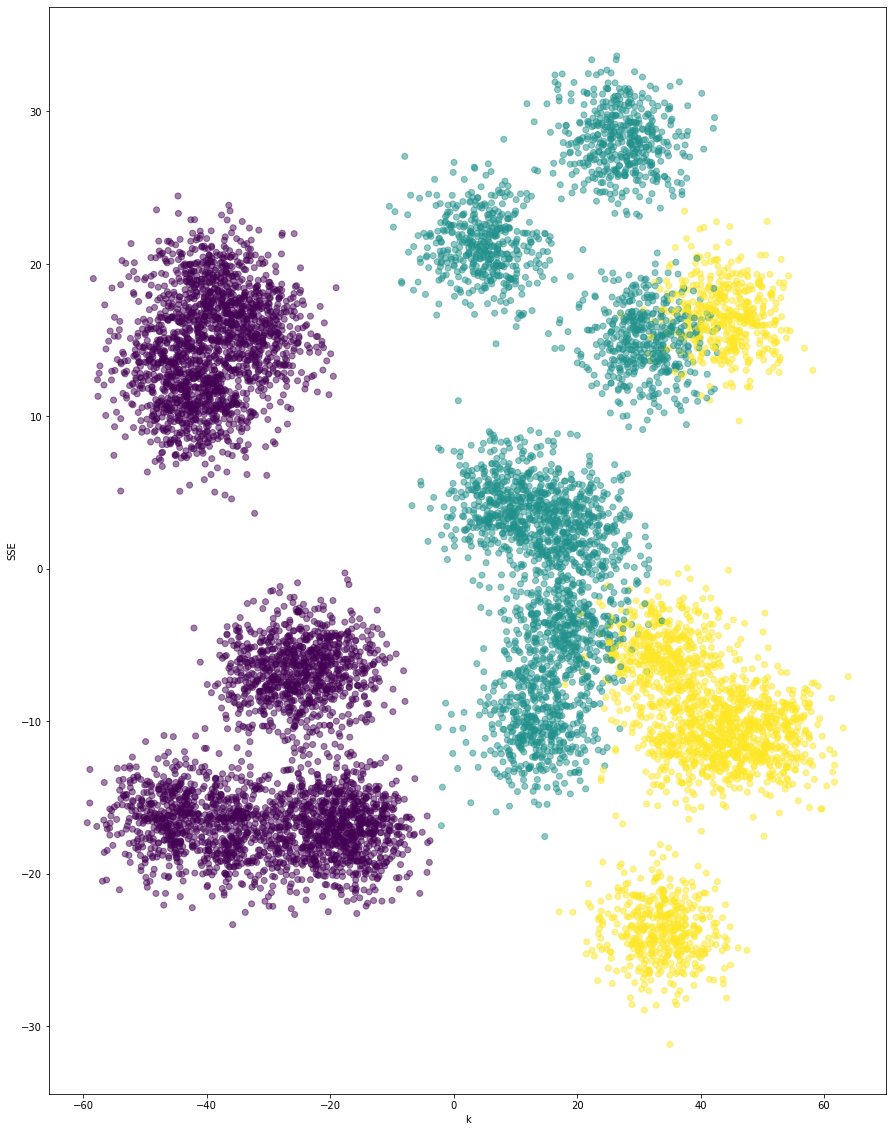

In [31]:
kmeans = KMeans(n_clusters = 3 ,random_state=2021)   
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.xlabel('k')
plt.ylabel('SSE');

กราฟจากข้อ3

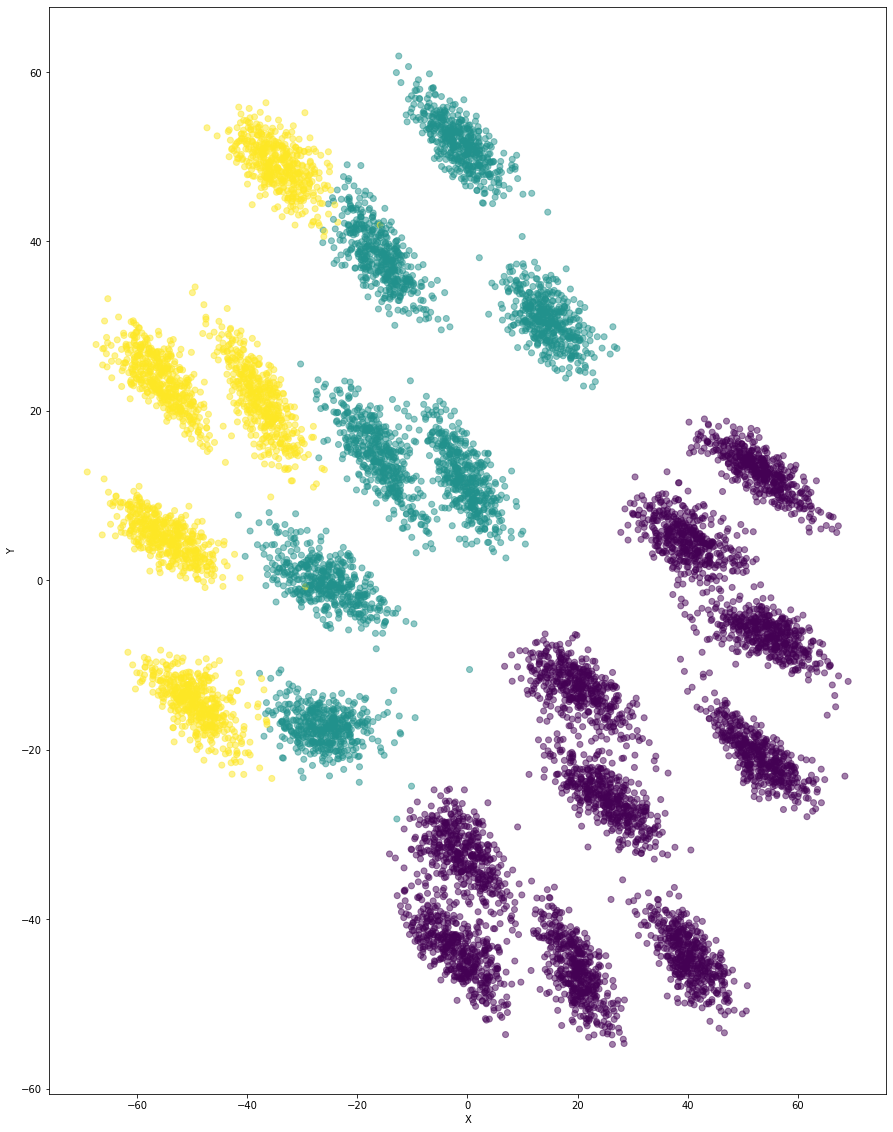

In [32]:
plt.scatter(New_mds[:,0],New_mds[:,1],c=D,alpha=0.5)  
plt.xlabel('X') 
plt.ylabel('Y');

จากการเปรียบเทียบกราฟทั้งข้อ 2 และข้อ 3 จะพบว่าการกระจายของข้อมูลนั้นต่างกัน

และข้อที่ 2 มีการจัดกลุ่มโดยการ clustering ก่อนที่จะทำการลด Dimention ด้วยวิธี PCA ซึ่งเป็นการลดไดเมนชั่น โดยที่ทุกๆจุดของข้อมูลจะอยู่ที่เดิม

และข้อ 3 มีการลดไดเมนชั่นของข้อมูลก่อน ค่อยนำข้อมูลที่ลดไดเมชั่นแล้วไปทำการ clustering ซึ่งทำการลด Dimention ด้วยวิธี MDS ซึ่งเป็นการลดไดเมนชั่น โดยที่ทุกๆจุดของข้อมูลจะยึดจุดตั้งต้นที่กำหนดเป็นหลัก

